In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)


c:\Users\karti\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df_US = df[ (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [9]:
job_titles=df_US['job_title_short'].value_counts().index[ :6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [10]:
df_US_top6=df_US[df_US['job_title_short'].isin(job_titles)]

In [15]:
job_order=df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

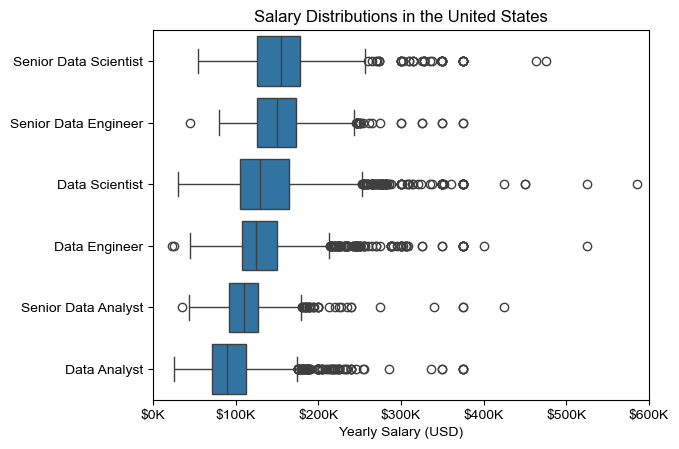

In [16]:
sns.boxplot(
    data=df_US_top6,
    x='salary_year_avg',
    y='job_title_short',
    order=job_order
)

sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)

ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()


In [20]:
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States')
].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US=df_DA_US.explode('job_skills')

In [21]:
df_DA_top_pay = (
    df_DA_US
    .groupby('job_skills')['salary_year_avg']
    .agg(['count', 'median'])
    .sort_values(by='median', ascending=False)
)

df_DA_top_pay = df_DA_top_pay.head(10)


In [23]:
df_DA_skills = (
    df_DA_US
    .groupby('job_skills')['salary_year_avg']
    .agg(['count', 'median'])
).sort_values(by='median',ascending=False)

df_DA_skills

,count,median
job_skills,,
dplyr,2,196250.000000
bitbucket,3,189000.000000
gitlab,3,186000.000000
solidity,1,179000.000000
hugging face,1,175000.000000
...,...,...
smartsheet,18,61250.000000
npm,3,60000.000000
vb.net,5,60000.000000
